In [8]:
%run functions/cytoscapeFunctions
%run functions/edgeFunctions
%run functions/springLayoutJN1
%run functions/dashFunc

In [9]:
from py2cytoscape import cyrest
import networkx as nx
import numpy as np
import pandas as pd
import random
import time
import tempfile
from networkx.generators.random_graphs import barabasi_albert_graph as ba
import os

In [10]:
G = nx.gnm_random_graph(10000,30000)

In [11]:
networkFolder = os.path.join(os.path.dirname(os.path.abspath("template.cys")), 'networks')
networkFolder

GMP = os.path.join(networkFolder, 'GMP')
Prog = os.path.join(networkFolder, 'Progenitor')

GMPedge = os.path.join(GMP, 'edge.tsv')
GMPnode = os.path.join(GMP, 'node.tsv')

ProgEdge = os.path.join(Prog, 'edge.tsv')
ProgNode = os.path.join(Prog, 'node.tsv')

gmpEdgeDF = pd.read_csv(GMPedge, delimiter = '\t')
gmpNodeDF = pd.read_csv(GMPnode, delimiter = '\t')
progEdgeDF = pd.read_csv(ProgEdge, delimiter = '\t')
progNodeDF = pd.read_csv(ProgNode, delimiter = '\t')

gmpNetwork = nx.Graph()
gmpOverlap = 0

for i in range (len(gmpEdgeDF)):
    if gmpNetwork.has_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i]):
        gmpOverlap += 1
    gmpNetwork.add_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i])
    
progNetwork = nx.Graph()

progOverlap = 0

for i in range (len(progEdgeDF)):
    if progNetwork.has_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i]):
        progOverlap += 1
    progNetwork.add_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i])

print(gmpOverlap, progOverlap)    

gmpNodeIndexDF = gmpNodeDF.set_index('Name')
progNodeIndexDF = progNodeDF.set_index('Name')

nx.set_node_attributes(gmpNetwork, gmpNodeDF.to_dict('index'))
nx.set_node_attributes(gmpNetwork, gmpNodeIndexDF.to_dict('index'))

gmpNetwork1 = gmpNetwork.copy()
# gmpNetwork1.remove_node('IRF7')

nx.set_node_attributes(progNetwork, progNodeDF.to_dict('index'))
nx.set_node_attributes(progNetwork, progNodeIndexDF.to_dict('index'))

32 10


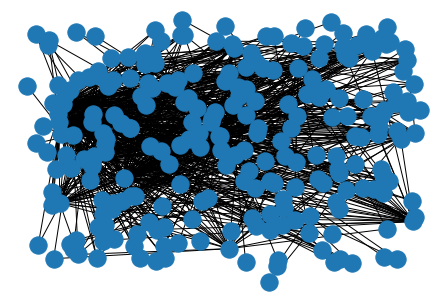

In [12]:
layout = fruchterman_reingold_layout_edit(gmpNetwork, seed = 1, iterations = 1000, pretendIterations = 50, stop = 10)
nx.draw(gmpNetwork, pos = layout)

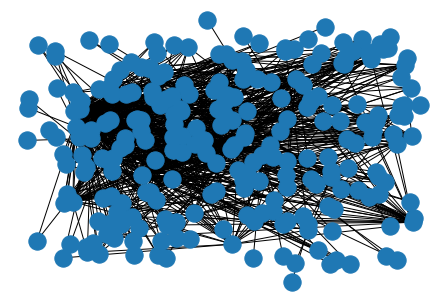

In [13]:
layout1 = fruchterman_reingold_layout_edit(gmpNetwork, seed = 1, pos = layout, iterations = 1000, pretendIterations = 50, stop = 10)
nx.draw(gmpNetwork, pos = layout1)

In [55]:
formatPos(gmpNetwork.nodes(data=True),layout, 100, False)[0]

{'data': {'id': 'BCL11A', 'label': 'BCL11A'},
 'position': {'x': -15.741832749985837, 'y': 28.74188836378131},
 'classes': ''}

In [14]:
formatPos(gmpNetwork.nodes(data=True),layout, 100, False)[0]

{'data': {'id': 'BCL11A', 'label': 'BCL11A'},
 'position': {'x': -15.741832749985837, 'y': 28.74188836378131},
 'classes': ''}

In [57]:
def makeFrames(network, numFrames, inIterations, inPretendIterations, inStop):
    posList = []
    layout = fruchterman_reingold_layout_edit(network, seed = 1, iterations = inIterations, pretendIterations = inPretendIterations, stop = inStop)
    for frame in range(numFrames):
        if frame == 0:
            posList.append(layout)
        else:
            nextLayout = fruchterman_reingold_layout_edit(network, seed = 1, iterations = inIterations, pretendIterations = inPretendIterations, pos = layout, stop = inStop)
            posList.append(nextLayout)
            layout = nextLayout
    
    
    return posList

In [62]:
def formatPosList(network, posList, multiplier, containsNodeData):
    dashList = []
    for frame in range(len(posList)):
        dashList.append(formatPos(network.nodes(data = True), posList[frame], multiplier, containsNodeData))
        
    return dashList

In [59]:
frames = makeFrames(gmpNetwork, 100, 1000, 50, 5)

In [66]:
dashFrames = formatPosList(gmpNetwork, frames, 1000, False)

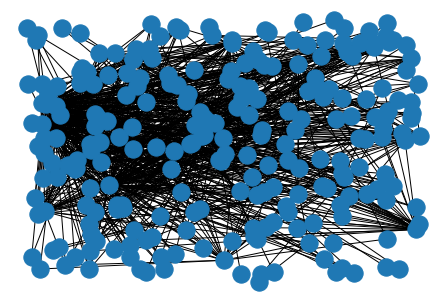

In [67]:
nx.draw(gmpNetwork, pos = frames[0])

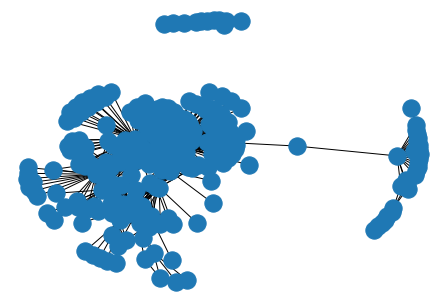

In [68]:
nx.draw(gmpNetwork, pos = frames[99])

In [69]:
101%100

1